# Assignment 1 Understanding Data Worked Examples

Example 1
Data set - https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price

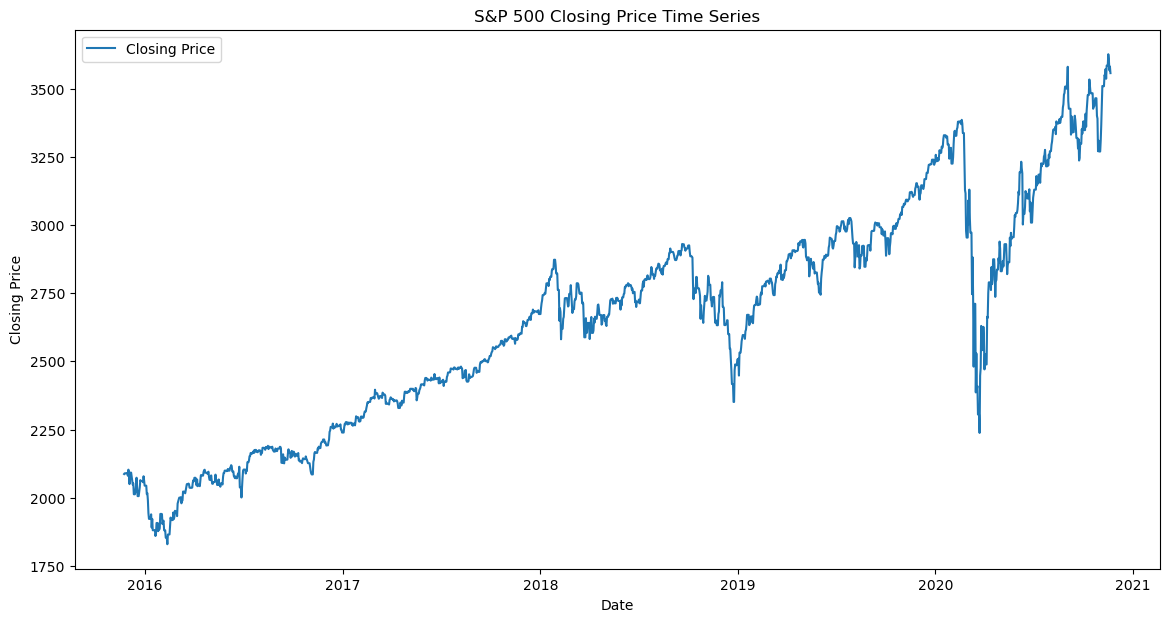

Root Mean Squared Error: 404.1082653383916


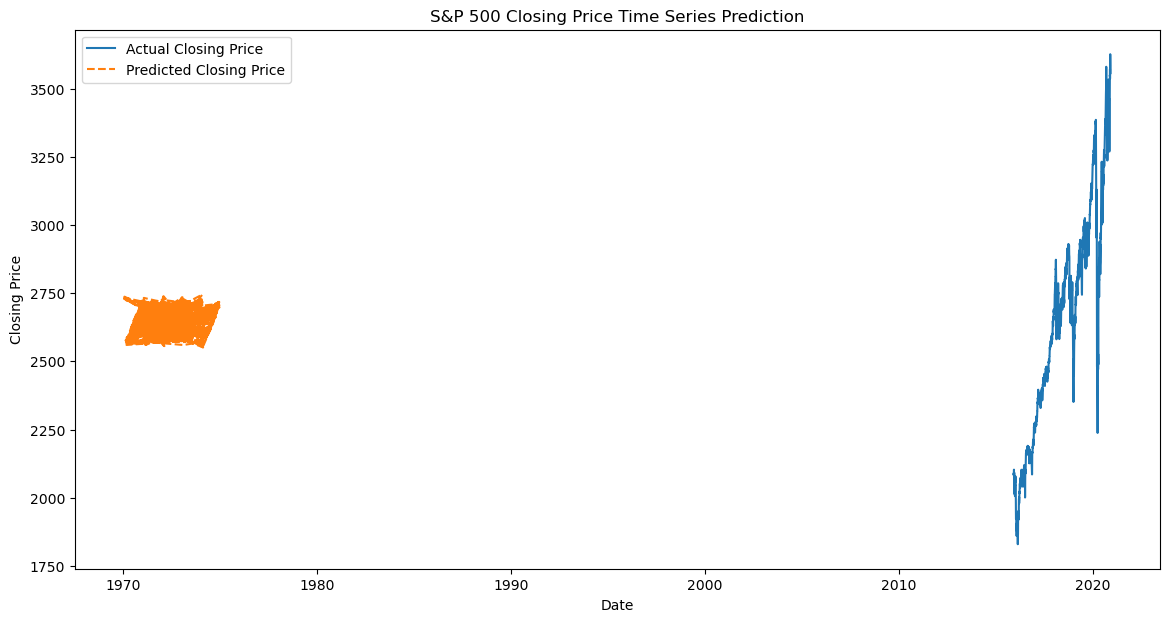

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv("C:/Users/HP/Downloads/archive/yahoo_stock.csv", parse_dates=['Date'])

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Time Series')
plt.legend()
plt.show()

# Feature engineering - adding dayofyear and dayofweek as features
data['DayOfYear'] = data['Date'].dt.dayofyear
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Splitting the data into training and testing sets
X = data[['DayOfYear', 'DayOfWeek']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print('Root Mean Squared Error:', rmse)

# Visualization of predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(X_test.index, predictions, label='Predicted Closing Price', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Time Series Prediction')
plt.legend()
plt.show()


Example 2

Data set - https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [31]:
# Load data from CSV
data = pd.read_csv("C:/Users/HP/Downloads/archive (5)/IOT-temp.csv")



# Check the structure of the dataset
print(data.head())
print(data.info())


                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB
None


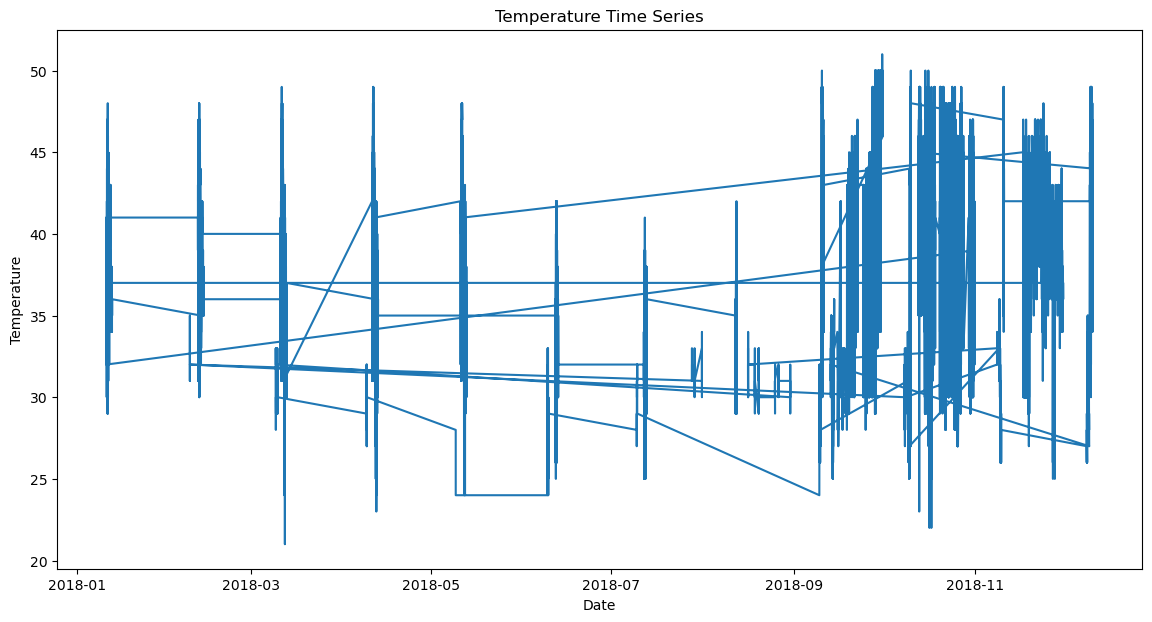

In [32]:
# Convert 'noted_date' to datetime
data['noted_date'] = pd.to_datetime(data['noted_date'])

# Set 'noted_date' as index
data.set_index('noted_date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['temp'])
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


In [35]:


# Assuming your datetime data is in the index, convert the index to datetime
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
X = data.index.astype(int).values.reshape(-1, 1)  # Use timestamps as features
y = data['temp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\HP\AppData\Local\Temp\ipykernel_16588\4275915659.py:5: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  X = data.index.astype(int).values.reshape(-1, 1)  # Use timestamps as features


In [36]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 5.688362402720489


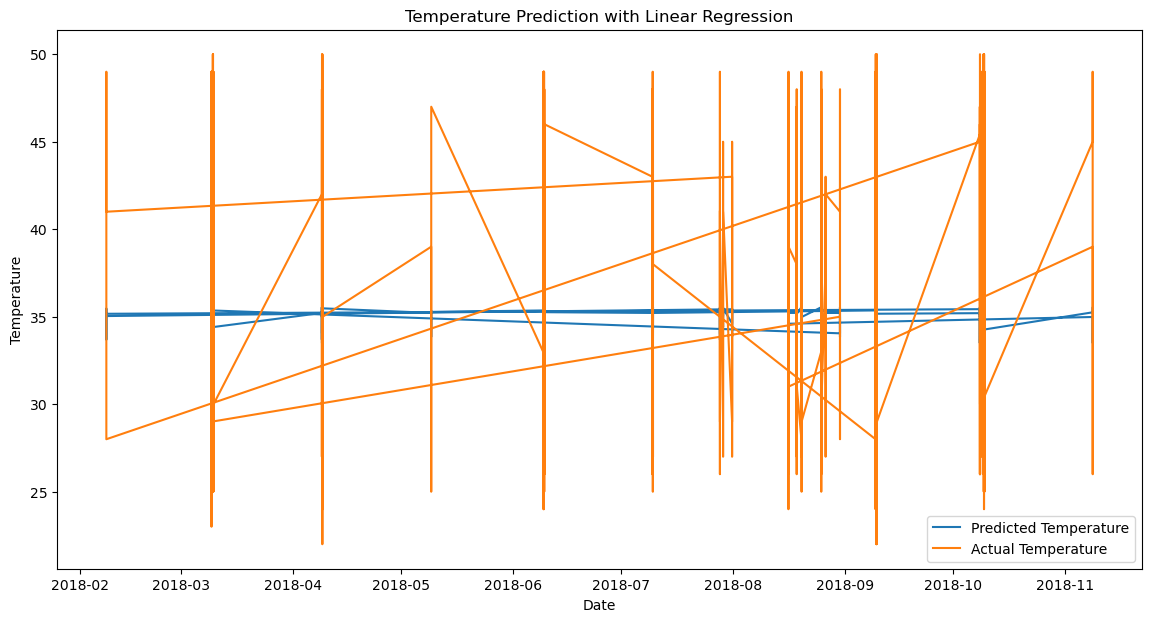

In [37]:
# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Temperature')
plt.plot(data.index[-len(y_test):], y_test, label='Actual Temperature')
plt.title('Temperature Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
